# Iteration method

In [18]:
import math


g = lambda x: (x**3 + 1) / 4

def fixed_point(x0, tol, n):
    print("Iteration\t x")
    i = 1
    while n > 0:    
        x1 = g(x0)
        
        print(f"{i}\t\t {x1:.6f}")
        i += 1
        
        if abs(x1 - x0) < tol:
            print("\nConverged!")
            return x1
        x0 = x1
        n -= 1      
    print("\nDid not converge within max iterations.")
    return None


x0 = 0.5
tol = 1e-5
n = 100

ans = fixed_point(x0, tol, n)
print("\nApproximate root:", ans)


Iteration	 x
1		 0.281250
2		 0.255562
3		 0.254173
4		 0.254105
5		 0.254102

Converged!

Approximate root: 0.25410185518358


# Bisection

In [24]:
import math

f = lambda x: x**3 - 4*x + 1

def bisection(a, b, tol, n):
    if f(a) * f(b) >= 0:
        print("Bisection method fails. f(a) and f(b) must have opposite signs.")
        return None

    print("Iteration\t a\t\t b\t\t c\t\t f(c)")
    i=1
    while i<=n:
        c = (a + b) / 2
        print(f"{i}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {f(c):.6f}")
        i += 1
        
        if abs(f(c)) < tol or abs(b - a)/2 < tol:
            print("\nConverged!")
            return c
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        

    print("\nDid not converge within max iterations.")
    return (a + b) / 2


a = 0
b = 1
tol = 1e-5
n = 200

root = bisection(a, b, tol, n)
print("\nApproximate root:", root)


Iteration	 a		 b		 c		 f(c)
1		 0.000000	 1.000000	 0.500000	 -0.875000
2		 0.000000	 0.500000	 0.250000	 0.015625
3		 0.250000	 0.500000	 0.375000	 -0.447266
4		 0.250000	 0.375000	 0.312500	 -0.219482
5		 0.250000	 0.312500	 0.281250	 -0.102753
6		 0.250000	 0.281250	 0.265625	 -0.043758
7		 0.250000	 0.265625	 0.257812	 -0.014114
8		 0.250000	 0.257812	 0.253906	 0.000744
9		 0.253906	 0.257812	 0.255859	 -0.006688
10		 0.253906	 0.255859	 0.254883	 -0.002973
11		 0.253906	 0.254883	 0.254395	 -0.001115
12		 0.253906	 0.254395	 0.254150	 -0.000185
13		 0.253906	 0.254150	 0.254028	 0.000279
14		 0.254028	 0.254150	 0.254089	 0.000047
15		 0.254089	 0.254150	 0.254120	 -0.000069
16		 0.254089	 0.254120	 0.254105	 -0.000011
17		 0.254089	 0.254105	 0.254097	 0.000018

Converged!

Approximate root: 0.25409698486328125


# False position

In [25]:
import math


f = lambda x: x**3 - 4*x + 1

def false_position(a, b, tol, n):
    if f(a) * f(b) >= 0:
        print("False Position method fails. f(a) and f(b) must have opposite signs.")
        return None

    print("Iteration\t a\t\t b\t\t c\t\t f(c)")
    i = 1
    c_old = a  
    
    while i <= n:
        
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        print(f"{i}\t\t {a:.6f}\t {b:.6f}\t {c:.6f}\t {f(c):.6f}")
        
        
        if abs(f(c)) < tol or abs(c - c_old) < tol:
            print("\nConverged!")
            return c
        
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        
        c_old = c
        i += 1

    print("\nDid not converge within max iterations.")
    return c


a = 0
b = 1
tol = 1e-5
n = 100

root = false_position(a, b, tol, n)
print("\nApproximate root:", root)


Iteration	 a		 b		 c		 f(c)
1		 0.000000	 1.000000	 0.333333	 -0.296296
2		 0.000000	 0.333333	 0.257143	 -0.011569
3		 0.000000	 0.257143	 0.254202	 -0.000382
4		 0.000000	 0.254202	 0.254105	 -0.000013
5		 0.000000	 0.254105	 0.254102	 -0.000000

Converged!

Approximate root: 0.25410179652231046


# Gauss elimination

In [28]:
import numpy as np

def gauss_elimination(A, b):
    n = len(b)
    # Create augmented matrix [A|b]
    Ab = np.hstack([A.astype(float), b.reshape(-1,1).astype(float)])
    
    print("Initial Augmented Matrix [A|b]:")
    print(Ab)
    print()
    
    # Forward Elimination
    for i in range(n):
        # Make the pivot = 1 (divide row by pivot element)
        pivot = Ab[i][i]
        if pivot == 0:
            raise ValueError("Zero pivot encountered!")
        Ab[i] = Ab[i] / pivot
        
        # Eliminate below
        for j in range(i+1, n):
            factor = Ab[j][i]
            Ab[j] = Ab[j] - factor * Ab[i]
        
        print(f"After eliminating column {i+1}:")
        print(Ab)
        print()
    
    # Back Substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = Ab[i][-1] - np.sum(Ab[i][i+1:n] * x[i+1:n])
    
    return x

# -------------------------
# Example system:
# 2x + y - z = 8
# -3x - y + 2z = -11
# -2x + y + 2z = -3
# -------------------------

A = np.array([[2, 1, -1],
              [-3, -1, 2],
              [-2, 1, 2]], dtype=float)

b = np.array([8, -11, -3], dtype=float)

solution = gauss_elimination(A, b)
print("Solution vector x =", solution)


Initial Augmented Matrix [A|b]:
[[  2.   1.  -1.   8.]
 [ -3.  -1.   2. -11.]
 [ -2.   1.   2.  -3.]]

After eliminating column 1:
[[ 1.   0.5 -0.5  4. ]
 [ 0.   0.5  0.5  1. ]
 [ 0.   2.   1.   5. ]]

After eliminating column 2:
[[ 1.   0.5 -0.5  4. ]
 [ 0.   1.   1.   2. ]
 [ 0.   0.  -1.   1. ]]

After eliminating column 3:
[[ 1.   0.5 -0.5  4. ]
 [ 0.   1.   1.   2. ]
 [-0.  -0.   1.  -1. ]]

Solution vector x = [ 2.  3. -1.]


# Gauss jordan elimination

In [29]:
# Augmented matrix [A|b]
arr = [
    [2, 1, -1, 8],
    [-3, -1, 2, -11],
    [-2, 1, 2, -3]
]
N = 3  # number of unknowns

def gauss_jordan(arr, N):
    for i in range(N):
        for j in range(N):
            if i != j:
                p = arr[j][i] / arr[i][i]
                for k in range(N+1):
                    arr[j][k] -= arr[i][k] * p
        print(f"After step {i+1}:")
        for row in arr:
            print(row)
        print()

    # Extract solutions
    solutions = [arr[i][N] / arr[i][i] for i in range(N)]
    print("Solutions:", solutions)
    return solutions

# Run Gauss-Jordan
solution = gauss_jordan(arr, N)


After step 1:
[2, 1, -1, 8]
[0.0, 0.5, 0.5, 1.0]
[0.0, 2.0, 1.0, 5.0]

After step 2:
[2.0, 0.0, -2.0, 6.0]
[0.0, 0.5, 0.5, 1.0]
[0.0, 0.0, -1.0, 1.0]

After step 3:
[2.0, 0.0, 0.0, 4.0]
[0.0, 0.5, 0.0, 1.5]
[0.0, 0.0, -1.0, 1.0]

Solutions: [2.0, 3.0, -1.0]


# Simple linear regression

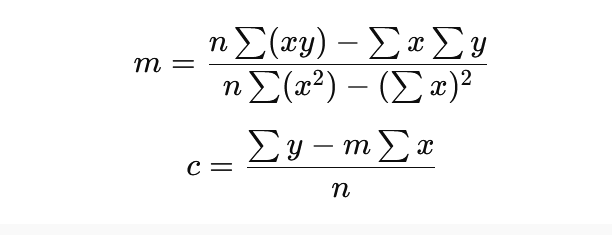

In [ ]:
import numpy as np

# Dataset
X = np.array([1, 2, 3, 4], dtype=float)
Y = np.array([2, 3, 4, 5], dtype=float)
n = len(X)

# Compute slope (m) and intercept (c)

m = (n*np.sum(X*Y) - np.sum(X)*np.sum(Y)) / (n*np.sum(X**2) - (np.sum(X))**2)
c = (np.sum(Y) - m*np.sum(X)) / n

print(f"Equation: Y = {m:.2f}X + {c:.2f}")

# Prediction
X_new = 5
print(f"Prediction for X={X_new}: {m*X_new + c:.2f}")


# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Dataset
# X = np.array([1, 2, 3, 4]).reshape(-1, 1)
# Y = np.array([2, 3, 4, 5])

# # Fit model
# model = LinearRegression().fit(X, Y)

# print(f"Equation: Y = {model.coef_[0]:.2f}X + {model.intercept_:.2f}")

# # Prediction
# print("Prediction for X=5:", model.predict([[5]])[0])



Equation: Y = 1.00X + 1.00
Prediction for X=5: 6.0


# Gradient descent

In [34]:
import numpy as np

# Gradient Descent Function for Linear Regression
def gradient_descent(x, y, m=0, b=0, learning_rate=0.01, epochs=10000):
    n = len(y)
    for _ in range(epochs):
        y_pred = m * x + b
        dm = (-2/n) * sum(x * (y - y_pred))  # derivative w.r.t m
        db = (-2/n) * sum(y - y_pred)        # derivative w.r.t b
        m -= learning_rate * dm
        b -= learning_rate * db
    return m, b

# -------------------------
# Example dataset
# -------------------------
x = np.array([1, 2, 3, 4], dtype=float)
y = np.array([2, 3, 4, 5], dtype=float)

# Run gradient descent
m, b = gradient_descent(x, y, learning_rate=0.01, epochs=10000)

print(f"Estimated slope (m) = {m:.4f}")
print(f"Estimated intercept (b) = {b:.4f}")

# Prediction example
x_new = 5
y_new = m * x_new + b
print(f"Prediction for x={x_new}: y={y_new:.4f}")


Estimated slope (m) = 1.0000
Estimated intercept (b) = 1.0000
Prediction for x=5: y=6.0000


# Logistic regression

In [42]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression
def logistic_gradient_descent(x, y, m=0, b=0, learning_rate=0.1, epochs=1000):
    n = len(y)
    for _ in range(epochs):
        z = m*x + b
        y_pred = sigmoid(z)
        
        # Gradients
        dm = (1/n) * sum((y_pred - y) * x)
        db = (1/n) * sum(y_pred - y)
        
        # Update parameters
        m -= learning_rate * dm
        b -= learning_rate * db
        
    return m, b

# -------------------------
# Example dataset (binary)
# -------------------------
x = np.array([1, 2, 3, 4], dtype=float)
y = np.array([0, 0, 1, 1], dtype=float)

# Run gradient descent
m, b = logistic_gradient_descent(x, y, learning_rate=0.1, epochs=1000)

print(f"Estimated slope (m) = {m:.4f}")
print(f"Estimated intercept (b) = {b:.4f}")

# Prediction for new value
x_new = 5
prob = sigmoid(m*x_new + b)
pred_class = 1 if prob >= 0.5 else 0  # predict class

print(f"Prediction for x={x_new}: P(Y=1) = {prob:.4f}")
print(f"Predicted class for x={x_new}: {pred_class}")


Estimated slope (m) = 2.3867
Estimated intercept (b) = -5.6964
Prediction for x=5: P(Y=1) = 0.9980
Predicted class for x=5: 1


# logistic built in

In [43]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# -------------------------
# Dataset (binary classification)
# -------------------------
X = np.array([1, 2, 3, 4]).reshape(-1, 1)  # sklearn expects 2D array
Y = np.array([0, 0, 1, 1])

# -------------------------
# Fit Logistic Regression
# -------------------------
model = LogisticRegression()
model.fit(X, Y)

# Extract parameters
m = model.coef_[0][0]       # slope
c = model.intercept_[0]     # intercept

print(f"Equation: P(Y=1) = 1 / (1 + exp(-({m:.4f}*X + {c:.4f})))")

# -------------------------
# Predict probability for new value
# -------------------------
X_new = np.array([[5]])
prob = model.predict_proba(X_new)[0][1]  # probability for class 1
print(f"Prediction for X={X_new[0][0]}: P(Y=1) = {prob:.4f}")

# -------------------------
# Optional: Predict class
# -------------------------
pred_class = model.predict(X_new)[0]
print(f"Predicted class for X={X_new[0][0]}: {pred_class}")


Equation: P(Y=1) = 1 / (1 + exp(-(0.9582*X + -2.3955)))
Prediction for X=5: P(Y=1) = 0.9165
Predicted class for X=5: 1
